# Data import

In [31]:
import sys
sys.path.append(r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis")

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import flexynesis
import torch
torch.set_num_threads(4)

Seed set to 42


In [29]:
# real data organize

# data prepare
# data import LCMS, HDF

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns


# 1. 指定存放原始与新文件的文件夹
load_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\data\preprocessed data"

# 3. after sample alignment
HDF = pd.read_csv(os.path.join(load_path, "S_HDF.csv"), index_col=0)
LD  = pd.read_csv(os.path.join(load_path, "S_LD.csv"),  index_col=0)
PM  = pd.read_csv(os.path.join(load_path, "S_PM.csv"),  index_col=0)
BM  = pd.read_csv(os.path.join(load_path, "S_BM.csv"),  index_col=0)

# metadata import
# female=1, male=0
# diabetic=1, nondiabetic=0
metadata = pd.read_excel(r"C:\Users\laura\OneDrive - Imperial College London\project 2\sample data.xlsx")

metadata['SampleId'] = metadata['SampleId'].astype(int)
HDF.index = HDF.index.astype(int)

merged_df = HDF.merge(
    metadata[['SampleId', 'SEX', 'DIAB', 'AGE', 'BMI']],
    left_index=True,
    right_on='SampleId'
)

merged_df['SEX_num'] = merged_df['SEX'].str.strip().str.lower().map({'female': 1, 'male': 0})
merged_df['DIAB_num'] = merged_df['DIAB'].str.strip().str.lower().map({'diabetic': 1, 'non-diabetic': 0})
print("Unmatched SEX values:", merged_df['SEX_num'].isna().sum())
print("Unmatched DIAB values:", merged_df['DIAB_num'].isna().sum())

y_dm = merged_df['DIAB_num']# diabetic=1, nondiabetic=0

# index alignment check
print(f"HDF shape: {HDF.shape}")
print(f"LD shape: {LD.shape}")
print(f"PM shape: {PM.shape}")
print(f"BM shape: {BM.shape}")


# Train-test split
y_dm.index = HDF.index
HDF_train, HDF_test, y_train, y_test = train_test_split(HDF, y_dm, test_size=0.3, random_state=42)
# Split LD, PM, BM using the same indices as HDF
LD_train = LD.loc[HDF_train.index]
LD_test  = LD.loc[HDF_test.index]

PM_train = PM.loc[HDF_train.index]
PM_test  = PM.loc[HDF_test.index]

BM_train = BM.loc[HDF_train.index]
BM_test  = BM.loc[HDF_test.index]

Y_train = y_dm.loc[HDF_train.index]
Y_test  = y_dm.loc[HDF_test.index]

print("train HDF shape:", HDF_train.shape)
print("test HDF shape:", HDF_test.shape)
print("train y_dm shape", y_train.shape)
print("test y_dm shape:", y_test.shape)
print("LD_train shape:", LD_train.shape)
print("LD_test shape:", LD_test.shape)
print("PM_train shape:", PM_train.shape)
print("PM_test shape:", PM_test.shape)
print("BM_train shape:", BM_train.shape)
print("BM_test shape:", BM_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)
print(Y_test)
print(HDF_train)

Unmatched SEX values: 0
Unmatched DIAB values: 0
HDF shape: (282, 904)
LD shape: (282, 1149)
PM shape: (282, 501)
BM shape: (282, 161)
train HDF shape: (197, 904)
test HDF shape: (85, 904)
train y_dm shape (197,)
test y_dm shape: (85,)
LD_train shape: (197, 1149)
LD_test shape: (85, 1149)
PM_train shape: (197, 501)
PM_test shape: (85, 501)
BM_train shape: (197, 161)
BM_test shape: (85, 161)
Y_train shape: (197,)
Y_test shape: (85,)
115    0
116    0
226    1
153    1
346    0
      ..
144    1
274    0
157    1
148    0
353    0
Name: DIAB_num, Length: 85, dtype: int64
     HDF38768  HDF38296  HDF57814  HDF48762  HDF52603  HDF19130  HDF34404  \
225 -0.493094 -0.623231 -0.172819 -1.062064 -0.833507 -0.355417  1.016007   
68  -0.326450 -0.765366 -0.445627 -0.834395  1.072175  0.634530 -0.428550   
138  0.786272  0.393284 -1.593750  2.169775 -2.103848 -0.804408 -0.819476   
282  0.712122  0.586020  1.418843 -1.095719 -0.300740 -0.433183 -0.401234   
50  -0.516785 -0.843879 -0.478150 -0.89

In [35]:
# 四个数据集
import inspect
from flexynesis import DataImporter

print(inspect.getfile(DataImporter))

from flexynesis import DataImporter

data_importer = DataImporter(
    path=r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1",
    data_types=['LD', 'PM', 'BM', 'HDF'],  # 四个数据集的名称，要和文件名对应
    concatenate=False,  # 根据你需求决定是否合并特征，通常False
    top_percentile=100,  # Laplacian选出前10%特征
    min_features=100,   # 至少保留100个特征
    variance_threshold=0.0,  # 80%的方差阈值
    # correlation_threshold=0.9,  # 如果需要可以打开
)

train_dataset, test_dataset, whole_dataset = data_importer.import_data()


C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\flexynesis\data.py

[INFO] ================= Importing Data =================
[INFO] Validating data folders...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\train\HDF.csv...
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\train\LD.csv...
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\train\BM.csv...
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\train\clin.csv...
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\train\PM.csv...

[INFO] ------------

In [5]:
# 1个数据集
import inspect
from flexynesis import DataImporter

print(inspect.getfile(DataImporter))

from flexynesis import DataImporter

data_importer = DataImporter(
    path=r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1",
    data_types=['BM'], 
    concatenate=False,  # 根据你需求决定是否合并特征，通常False
    top_percentile=100,  # Laplacian选出前10%特征
    min_features=100,   # 至少保留100个特征
    variance_threshold=0.0,  # 80%的方差阈值
    # correlation_threshold=0.9,  # 如果需要可以打开
)

train_dataset, test_dataset, whole_dataset = data_importer.import_data()


C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\flexynesis\data.py

[INFO] ================= Importing Data =================
[INFO] Validating data folders...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\train\BM.csv...
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\train\clin.csv...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\test\BM.csv...
[INFO] Importing C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM1\test\clin.csv...

[INFO] ----------------- Checking for problems with the input data ----------------- 
[INFO] Data struct

#  Model training

<Figure size 800x300 with 0 Axes>

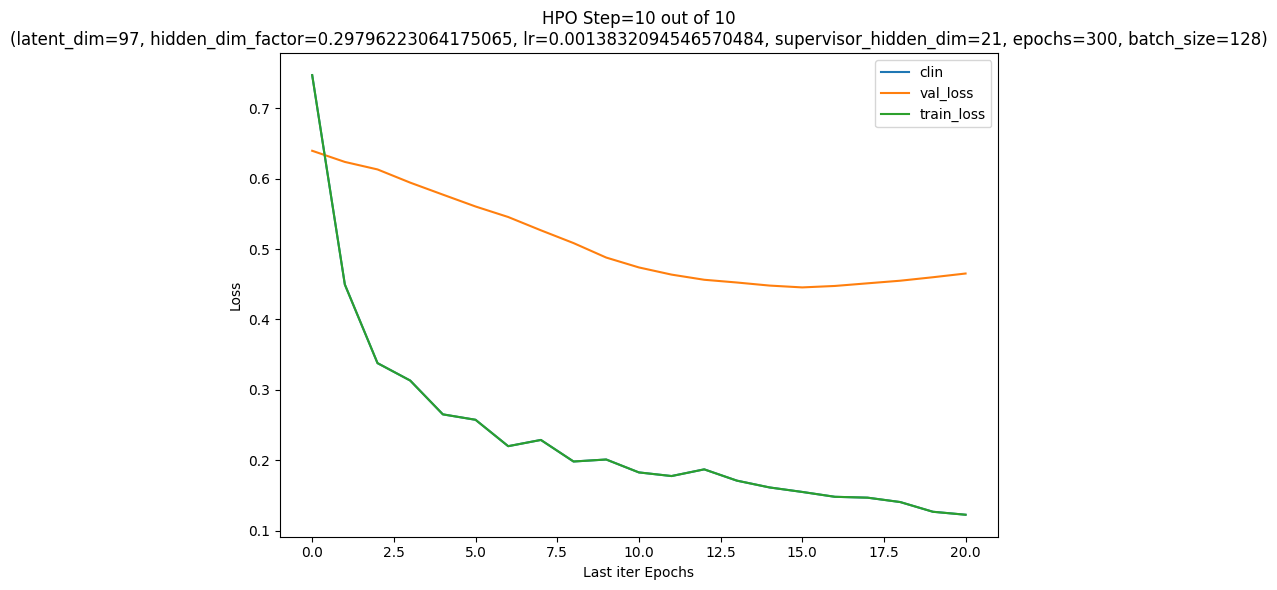

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           clin            │    0.46522438526153564    │
│         val_loss          │    0.46522438526153564    │
└───────────────────────────┴───────────────────────────┘

Tuning Progress: 100%|██████████| 10/10 [09:18<00:00, 55.87s/it, Iteration=10, Best Loss=0.327]

[INFO] current best val loss: 0.3271360993385315; best params: {'latent_dim': 26, 'hidden_dim_factor': 0.38551580279992625, 'lr': 0.0005820013372709849, 'supervisor_hidden_dim': 32, 'epochs': 300, 'batch_size': 128} since 5 hpo iterations


<Figure size 800x300 with 0 Axes>

In [37]:
import pandas as pd
# early stopping -  tune the best parameters
tuner = flexynesis.HyperparameterTuning(
    dataset = train_dataset,                # training dataset
    model_class = flexynesis.DirectPred,   # model selection
    target_variables = ["clin"],# outcome variable
    config_name = "DirectPred",             
    n_iter=10, # how many time the hyperparameters are trained
    cv_splits=3,
    plot_losses=True,                      # open the losss ploting function
    early_stop_patience=5               
)

model, best_params, configs = tuner.perform_tuning()  


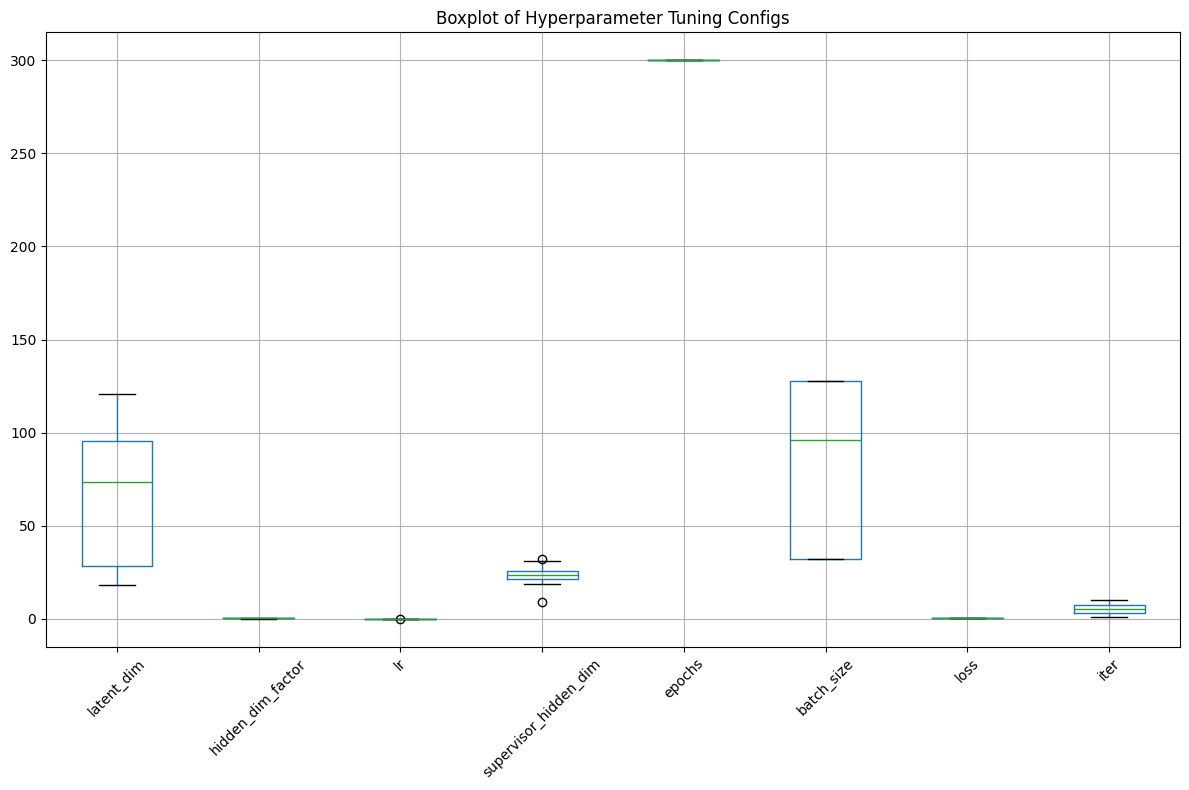

,latent_dim,hidden_dim_factor,lr,supervisor_hidden_dim,epochs,batch_size,loss,iter
0,105,0.255030,0.003626,22,300,32,0.525880,1
1,67,0.300113,0.000193,24,300,128,0.500785,2
2,121,0.200234,0.009648,23,300,32,0.674719,3
3,19,0.357432,0.000631,9,300,32,0.388861,4
4,26,0.385516,0.000582,32,300,128,0.327136,5
5,92,0.335150,0.000106,31,300,64,0.571036,6
6,18,0.269268,0.000303,24,300,128,0.504424,7
7,35,0.317318,0.000231,26,300,32,0.578268,8
8,80,0.209394,0.004837,19,300,128,0.648455,9
9,97,0.297962,0.001383,21,300,128,0.465224,10


In [39]:

import matplotlib.pyplot as plt
import pandas as pd

# 假设configs是你的DataFrame变量名
# configs = pd.read_csv("your_configs.csv") # 如果从文件读入的话

# 画箱型图
plt.figure(figsize=(12, 8))
configs.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Hyperparameter Tuning Configs")
plt.tight_layout()
plt.show()

configs

In [19]:
model

DirectPred(
  (log_vars): ParameterDict(  (clin): Parameter containing: [torch.FloatTensor of size 1])
  (encoders): ModuleList(
    (0): MLP(
      (layer_1): Linear(in_features=161, out_features=53, bias=True)
      (layer_out): Linear(in_features=53, out_features=89, bias=True)
      (relu): ReLU()
      (dropout): Dropout(p=0.1, inplace=False)
      (batchnorm): BatchNorm1d(53, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (MLPs): ModuleDict(
    (clin): MLP(
      (layer_1): Linear(in_features=89, out_features=19, bias=True)
      (layer_out): Linear(in_features=19, out_features=2, bias=True)
      (relu): ReLU()
      (dropout): Dropout(p=0.1, inplace=False)
      (batchnorm): BatchNorm1d(19, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
)

In [21]:
best_params

{'latent_dim': 89,
 'hidden_dim_factor': 0.33483519350234153,
 'lr': 0.003752739226571087,
 'supervisor_hidden_dim': 19,
 'epochs': 29,
 'batch_size': 128}

# Prediction 

⚠️ Warning: All outcome variables are forcibly treated as categorical during evaluation.


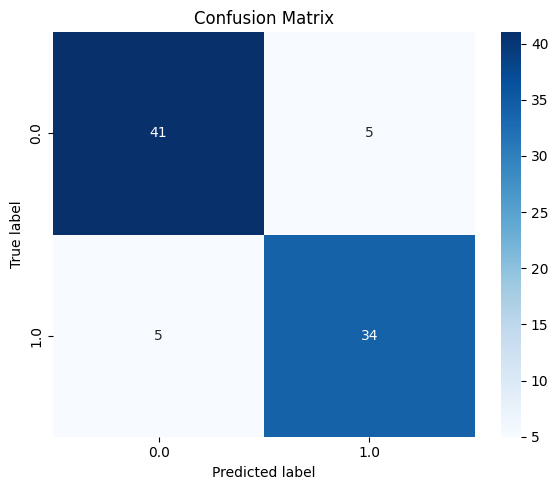

,method,var,variable_type,metric,value
0,DirectPred,clin,categorical,balanced_acc,0.881550
1,DirectPred,clin,categorical,f1_score,0.882353
2,DirectPred,clin,categorical,precision,0.882353
3,DirectPred,clin,categorical,recall,0.882353
4,DirectPred,clin,categorical,kappa,0.763099
5,DirectPred,clin,categorical,average_auroc,0.947046
6,DirectPred,clin,categorical,average_aupr,0.937266


In [41]:
y_pred_dict = model.predict(test_dataset)
metrics_df = flexynesis.evaluate_wrapper(method = 'DirectPred', y_pred_dict=y_pred_dict, dataset = test_dataset)
metrics_df

# Feature selection

In [43]:
# logit
import torch
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from captum.attr import IntegratedGradients, GradientShap

def Forward_target(model, *args):
    input_data = list(args[:-1])  # the rest are input tensors
    steps = args[-1]
    outputs_list = []
    for i in range(steps):
        x_step = [input_data[j][i] for j in range(len(input_data))]
        out = model.forward(x_step)  # assume dict output
        logits = out[next(iter(out))] if isinstance(out, dict) else out  # 取出tensor
        logit_diff = logits[:, 1] - logits[:, 0]  # shape: [batch_size]
        outputs_list.append(logit_diff)
    return torch.cat(outputs_list, dim=0)


def Compute_Feature_Importance_logit(
    model, 
    dataset, 
    target_var, 
    method="IntegratedGradients", 
    steps_or_samples=5, 
    batch_size=64, 
    device='cpu',
    feature_importances=None
):
    """
    Computes the feature importance using logit difference (class1 - class0).
    Keeps attribution direction (positive/negative), does not take abs().
    """
    model.to(device)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Select explainer
    if method == "IntegratedGradients":
        explainer = IntegratedGradients(lambda *args: Forward_target(model, *args))
    elif method == "GradientShap":
        explainer = GradientShap(lambda *args: Forward_target(model, *args))
    else:
        raise ValueError(f"Unsupported method '{method}'")

    # Only compute once for logit difference
    aggregated_attributions = [[]]
    for batch in dataloader:
        dat, _, _ = batch
        x_list = [dat[x].to(device) for x in dat.keys()]
        input_data = tuple([data.unsqueeze(0).requires_grad_() for data in x_list])

        if method == 'IntegratedGradients':
            baseline = tuple(torch.zeros_like(x) for x in input_data)
            attributions = explainer.attribute(
                input_data, baseline, 
                additional_forward_args=(steps_or_samples,), 
                n_steps=steps_or_samples
            )
        elif method == 'GradientShap':
            baseline = tuple(
                torch.cat([torch.zeros_like(x) for _ in range(steps_or_samples)], dim=0)
                for x in input_data
            )
            attributions = explainer.attribute(
                input_data, baseline,
                additional_forward_args=(steps_or_samples,), 
                n_samples=steps_or_samples
            )
        aggregated_attributions[0].append(attributions)

    # Post-processing
    layers = list(dataset.dat.keys())
    num_layers = len(layers)
    processed_attributions = []
    for class_attr in aggregated_attributions:
        layer_attributions = []
        for layer_idx in range(num_layers):
            layer_tensors = [batch_attr[layer_idx] for batch_attr in class_attr]
            attr_concat = torch.cat(layer_tensors, dim=1)
            layer_attributions.append(attr_concat)
        processed_attributions.append(layer_attributions)

    # No abs: preserve direction of attribution
    attr_cpu = [[a.cpu() for a in attr_class] for attr_class in processed_attributions]
    imp = [[a.mean(dim=1) for a in attr_class] for attr_class in attr_cpu]
    model.to('cpu')

    # Build DataFrame
    df_list = []
    for i in range(1):  # Only one logit difference now
        for j in range(len(layers)):
            features = dataset.features[layers[j]]
            importances = imp[i][j][0].detach().numpy()
            df_list.append(pd.DataFrame({
                'target_variable': target_var, 
                'target_class': 'logit_diff', 
                'target_class_label': 'logit1 - logit0',
                'layer': layers[j], 
                'name': features, 
                'importance': importances
            }))    
    df_imp = pd.concat(df_list, ignore_index=True)
    if feature_importances is not None:
        feature_importances[target_var] = df_imp
    return df_imp


In [45]:
df_importance_logit = Compute_Feature_Importance_logit(
    model=model,
    dataset=whole_dataset,
    target_var="clin",
    method="GradientShap",
    steps_or_samples=10,
    batch_size=32,
    device='cpu'
)

print(df_importance_logit.shape)


(2715, 6)


In [47]:
df_importance_logit

,target_variable,target_class,target_class_label,layer,name,importance
0,clin,logit_diff,logit1 - logit0,HDF,HDF38768_HDF,-0.001856
1,clin,logit_diff,logit1 - logit0,HDF,HDF38296_HDF,-0.001468
2,clin,logit_diff,logit1 - logit0,HDF,HDF57814_HDF,0.000213
3,clin,logit_diff,logit1 - logit0,HDF,HDF48762_HDF,0.000229
4,clin,logit_diff,logit1 - logit0,HDF,HDF52603_HDF,-0.001938
...,...,...,...,...,...,...
2710,clin,logit_diff,logit1 - logit0,LD,PC.y_LD,-0.001047
2711,clin,logit_diff,logit1 - logit0,LD,PE_LD,-0.000630
2712,clin,logit_diff,logit1 - logit0,LD,PI_LD,0.000546
2713,clin,logit_diff,logit1 - logit0,LD,SM.y_LD,-0.000611


In [49]:
# diff
import torch
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from captum.attr import IntegratedGradients, GradientShap

def Forward_target(model, *args):
    input_data = list(args[:-2])  # one or more tensors (one per omics layer)
    target_var = args[-2]  # target variable of interest
    steps = args[-1]  # number of steps/samples for IntegratedGradients().attribute or GradientShap.attribute 
    outputs_list = []
    for i in range(steps):
        # get list of tensors for each step into a list of tensors
        x_step = [input_data[j][i] for j in range(len(input_data))]
        out = model.forward(x_step)
        outputs_list.append(out[target_var])
    return torch.cat(outputs_list, dim = 0)

def Compute_Feature_Importance_diff(
    model, 
    dataset, 
    target_var, 
    method="IntegratedGradients", 
    steps_or_samples=5, 
    batch_size=64, 
    device='cpu',
    feature_importances=None
):
    """
    Computes the feature importance for each variable in the dataset using either Integrated Gradients or Gradient SHAP.

    Args:
        model: your pytorch model
        dataset: The dataset object containing the features and data.
        target_var (str): The target variable for which feature importance is calculated.
        method (str, optional): The attribution method to use ("IntegratedGradients" or "GradientShap").
                                Defaults to "IntegratedGradients".
        steps_or_samples (int, optional): Number of steps for Integrated Gradients or samples for Gradient SHAP.
                                          Defaults to 5.
        batch_size (int, optional): The size of the batch to process the dataset. Defaults to 64.
        device (str, optional): 'cpu' or 'cuda'
        feature_importances (dict, optional): dict to store feature importance results

    Returns:
        pd.DataFrame: A DataFrame containing feature importances across different variables and data modalities.
    """
    model.to(device)

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Choose the attribution method dynamically
    if method == "IntegratedGradients":
        explainer = IntegratedGradients(lambda *args: Forward_target(model, *args))
    elif method == "GradientShap":
        explainer = GradientShap(lambda *args: Forward_target(model, *args))
    else:
        raise ValueError(f"Unsupported method '{method}'. Choose 'IntegratedGradients' or 'GradientShap'.")

    # Handle target class (numerical vs categorical)
    if dataset.variable_types[target_var] == 'numerical':
        num_class = 1
    else:
        num_class = len(np.unique([y[target_var] for _, y, _ in dataset]))

    aggregated_attributions = [[] for _ in range(num_class)]
    for batch in dataloader:
        dat, _, _ = batch
        x_list = [dat[x].to(device) for x in dat.keys()]
        input_data = tuple([data.unsqueeze(0).requires_grad_() for data in x_list])

        if method == 'IntegratedGradients':
            baseline = tuple(torch.zeros_like(x) for x in input_data)
        elif method == 'GradientShap': # provide multiple baselines for Gr.Shap
            baseline = tuple(
                torch.cat([torch.zeros_like(x) for _ in range(steps_or_samples)], dim=0)
                for x in input_data
            )
        if num_class == 1:
            if method == 'IntegratedGradients':
                attributions = explainer.attribute(input_data, baseline, 
                                             additional_forward_args=(target_var, steps_or_samples), 
                                             n_steps=steps_or_samples)
            elif method == 'GradientShap':
                attributions = explainer.attribute(input_data, baseline, 
                                             additional_forward_args=(target_var, steps_or_samples), 
                                             n_samples=steps_or_samples)
            aggregated_attributions[0].append(attributions)
        else:
            for target_class in range(num_class):
                if method == 'IntegratedGradients':
                    attributions = explainer.attribute(input_data, baseline, 
                                                       additional_forward_args=(target_var, steps_or_samples), 
                                                       target=target_class,
                                                       n_steps=steps_or_samples)
                elif method == 'GradientShap':
                    attributions = explainer.attribute(input_data, baseline, 
                                                       additional_forward_args=(target_var, steps_or_samples), 
                                                       target=target_class,
                                                       n_samples=steps_or_samples)
                aggregated_attributions[target_class].append(attributions)
    # Post-process attributions
    layers = list(dataset.dat.keys())
    num_layers = len(layers)
    processed_attributions = []
    for class_idx in range(len(aggregated_attributions)):
        class_attr = aggregated_attributions[class_idx]
        layer_attributions = []
        for layer_idx in range(num_layers):
            layer_tensors = [batch_attr[layer_idx] for batch_attr in class_attr]
            attr_concat = torch.cat(layer_tensors, dim=1)
            layer_attributions.append(attr_concat)
        processed_attributions.append(layer_attributions)

    #abs_attr = [[torch.abs(a).cpu() for a in attr_class] for attr_class in processed_attributions]
    #imp = [[a.mean(dim=1) for a in attr_class] for attr_class in abs_attr]
    attr_cpu = [[a.cpu() for a in attr_class] for attr_class in processed_attributions]
    imp = [[a.mean(dim=1) for a in attr_class] for attr_class in attr_cpu]

    model.to('cpu')

    # Combine results into a DataFrame
    df_list = []
    for i in range(num_class):
        for j in range(len(layers)):
            features = dataset.features[layers[j]]
            importances = imp[i][j][0].detach().numpy()
            target_class_label = dataset.label_mappings[target_var].get(i) if target_var in dataset.label_mappings else ''
            df_list.append(pd.DataFrame({'target_variable': target_var, 
                                         'target_class': i, 
                                         'target_class_label': target_class_label,
                                         'layer': layers[j], 
                                         'name': features, 
                                         'importance': importances}))    
    df_imp = pd.concat(df_list, ignore_index=True)
    if feature_importances is not None:
        feature_importances[target_var] = df_imp


        # === 新增部分：生成 class_diff 表格 ===
    if num_class == 2:
        df_0 = df_imp[df_imp['target_class'] == 0].copy()
        df_1 = df_imp[df_imp['target_class'] == 1].copy()

        # 设定索引用于匹配
        key_cols = ['target_variable', 'layer', 'name']
        df_0 = df_0.set_index(key_cols)
        df_1 = df_1.set_index(key_cols)

        # 对应相减，得到方向性差值
        diff_series = df_1['importance'] - df_0['importance']

        # 构建结果表格
        class_diff = pd.DataFrame({
            'target_variable': df_1.index.get_level_values('target_variable'),
            'layer': df_1.index.get_level_values('layer'),
            'name': df_1.index.get_level_values('name'),
            'importance_diff': diff_series,
            'importance_diff_abs': diff_series.abs()
        }).reset_index(drop=True)

    else:
        class_diff = None  # 多于两个类别暂不支持自动计算差值

    return df_imp, class_diff



In [51]:
df_importance, df_importance_diff = Compute_Feature_Importance_diff(
    model=model,
    dataset=whole_dataset,
    target_var="clin",
    method="GradientShap",
    steps_or_samples=10,
    batch_size=32,
    device='cpu'
)

print(df_importance_diff.shape)


(2715, 5)


In [63]:
df_importance_diff

,target_variable,layer,name,importance_diff,importance_diff_abs
0,clin,HDF,HDF38768_HDF,-0.001981,0.001981
1,clin,HDF,HDF38296_HDF,-0.001512,0.001512
2,clin,HDF,HDF57814_HDF,0.000125,0.000125
3,clin,HDF,HDF48762_HDF,0.000275,0.000275
4,clin,HDF,HDF52603_HDF,-0.001980,0.001980
...,...,...,...,...,...
2710,clin,LD,PC.y_LD,-0.001075,0.001075
2711,clin,LD,PE_LD,-0.000634,0.000634
2712,clin,LD,PI_LD,0.000549,0.000549
2713,clin,LD,SM.y_LD,-0.000580,0.000580


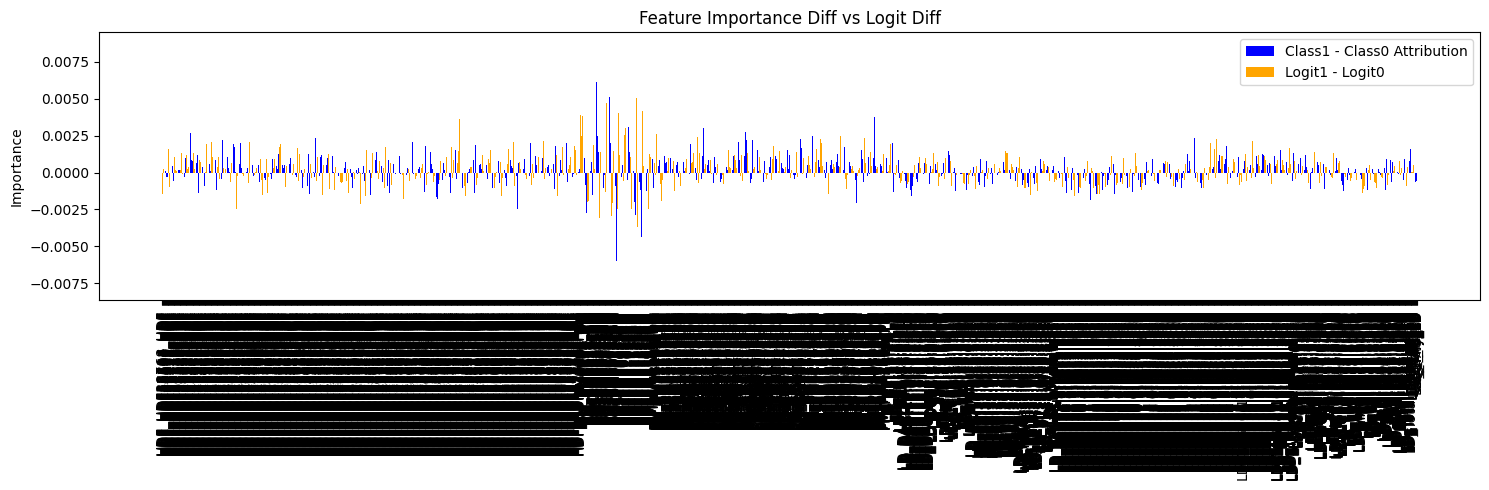

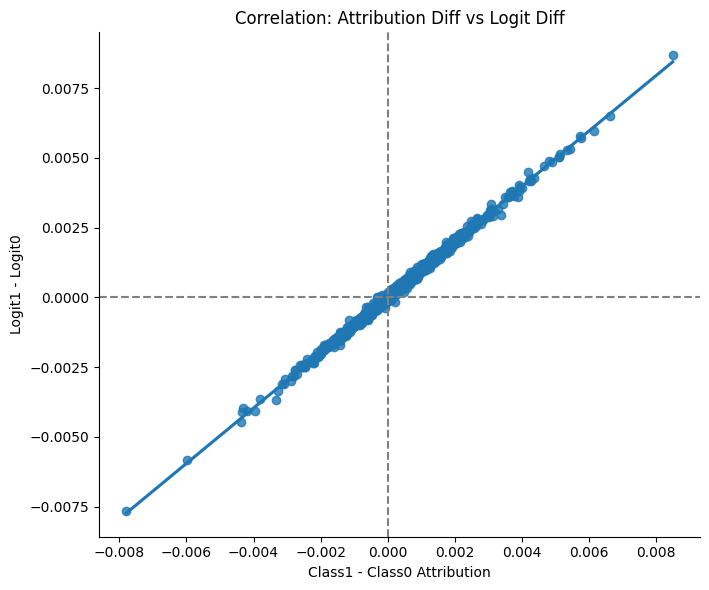

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_importance_comparison(df_importance_logit, df_importance_diff):
    # Step 1: 特征标识统一
    df_logit = df_importance_logit.copy()
    df_logit["feature"] = df_logit["layer"] + "_" + df_logit["name"]
    df_logit = df_logit[["feature", "importance"]].rename(columns={"importance": "logit_diff"})

    df_diff = df_importance_diff.copy()
    df_diff["feature"] = df_diff["layer"] + "_" + df_diff["name"]
    df_diff = df_diff[["feature", "importance_diff"]]

    # Step 2: Merge
    df_merge = pd.merge(df_logit, df_diff, on="feature")

    # Step 3: 条形图
    plt.figure(figsize=(15, 5))
    features = df_merge["feature"]
    x = range(len(features))

    plt.bar(x, df_merge["importance_diff"], width=0.4, label='Class1 - Class0 Attribution', color='blue', align='center')
    plt.bar([i + 0.4 for i in x], df_merge["logit_diff"], width=0.4, label='Logit1 - Logit0', color='orange', align='center')

    plt.xticks([i + 0.2 for i in x], features, rotation=90)
    plt.ylabel("Importance")
    plt.title("Feature Importance Diff vs Logit Diff")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 4: 散点图 + 相关趋势线
    sns.lmplot(data=df_merge, x="importance_diff", y="logit_diff", height=6, aspect=1.2)
    plt.title("Correlation: Attribution Diff vs Logit Diff")
    plt.xlabel("Class1 - Class0 Attribution")
    plt.ylabel("Logit1 - Logit0")
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.tight_layout()
    plt.show()
plot_importance_comparison(df_importance_logit, df_importance_diff)


In [38]:
df_importance

,target_variable,target_class,target_class_label,layer,name,importance
0,clin,0,DM,BM,BM0001_BM,0.004418
1,clin,0,DM,BM,BM0002_BM,-0.001511
2,clin,0,DM,BM,BM0003_BM,0.002245
3,clin,0,DM,BM,BM0004_BM,0.008325
4,clin,0,DM,BM,BM0005_BM,-0.000713
...,...,...,...,...,...,...
317,clin,1,nonDM,BM,BM0159_BM,0.006293
318,clin,1,nonDM,BM,BM0160_BM,-0.003654
319,clin,1,nonDM,BM,BM0161_BM,-0.009846
320,clin,1,nonDM,BM,BM0162_BM,-0.000223


In [50]:
class_diff

,target_variable,layer,name,importance_diff,importance_diff_abs
0,clin,BM,BM0001_BM,-0.006585,0.006585
1,clin,BM,BM0002_BM,-0.002103,0.002103
2,clin,BM,BM0003_BM,-0.009984,0.009984
3,clin,BM,BM0004_BM,-0.016861,0.016861
4,clin,BM,BM0005_BM,-0.002324,0.002324
...,...,...,...,...,...
156,clin,BM,BM0159_BM,0.007167,0.007167
157,clin,BM,BM0160_BM,-0.007764,0.007764
158,clin,BM,BM0161_BM,-0.014945,0.014945
159,clin,BM,BM0162_BM,0.002987,0.002987


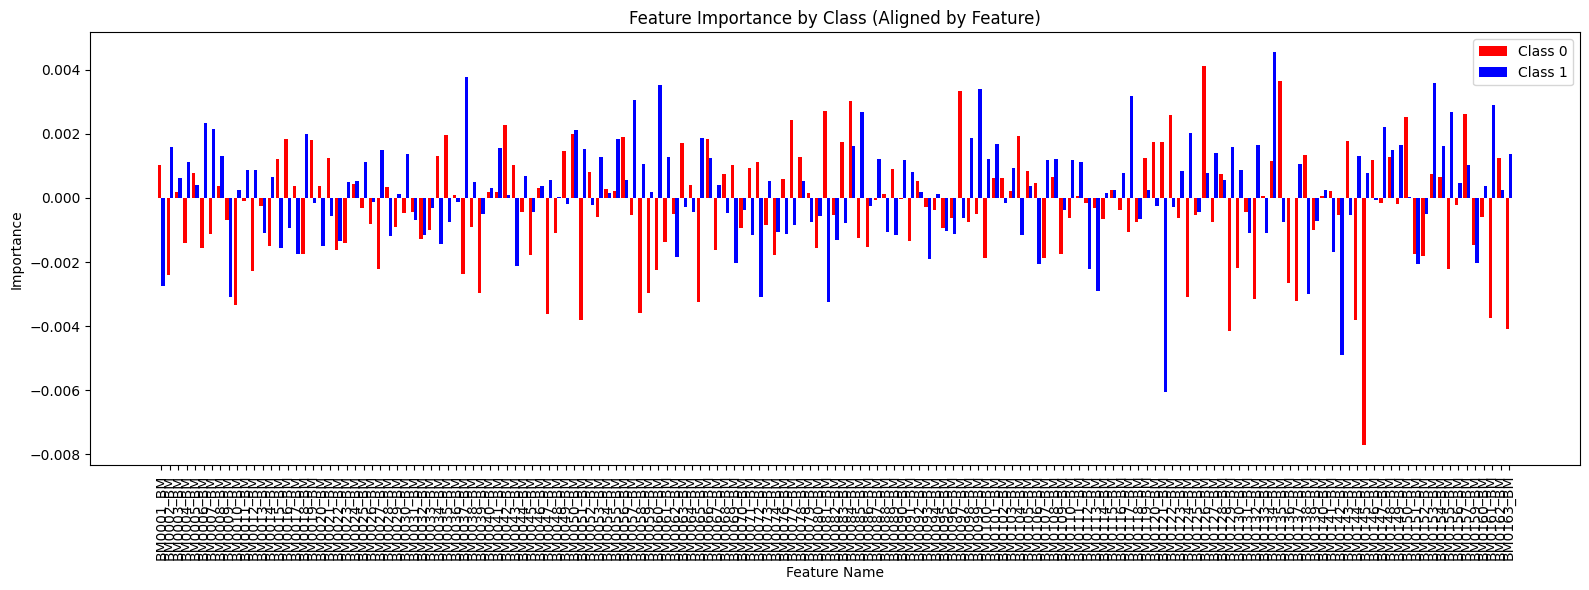

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def plot_aligned_feature_importance(df_imp, figsize=(16, 6)):
    # 只保留 BM block
    df_bm = df_imp[df_imp['layer'] == 'BM']
    
    # 按特征名称和类别分别分组
    df_0 = df_bm[df_bm['target_class'] == 0].set_index('name')
    df_1 = df_bm[df_bm['target_class'] == 1].set_index('name')

    # 对齐两个类别的特征（确保顺序一致）
    common_features = sorted(set(df_0.index).intersection(set(df_1.index)))
    df_0 = df_0.loc[common_features]
    df_1 = df_1.loc[common_features]

    indices = np.arange(len(common_features))
    width = 0.4  # 柱子宽度

    plt.figure(figsize=figsize)
    plt.bar(indices - width/2, df_0['importance'], width=width, color='red', label='Class 0')
    plt.bar(indices + width/2, df_1['importance'], width=width, color='blue', label='Class 1')

    plt.xticks(indices, common_features, rotation=90)
    plt.xlabel('Feature Name')
    plt.ylabel('Importance')
    plt.title('Feature Importance by Class (Aligned by Feature)')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_aligned_feature_importance(df_importance)

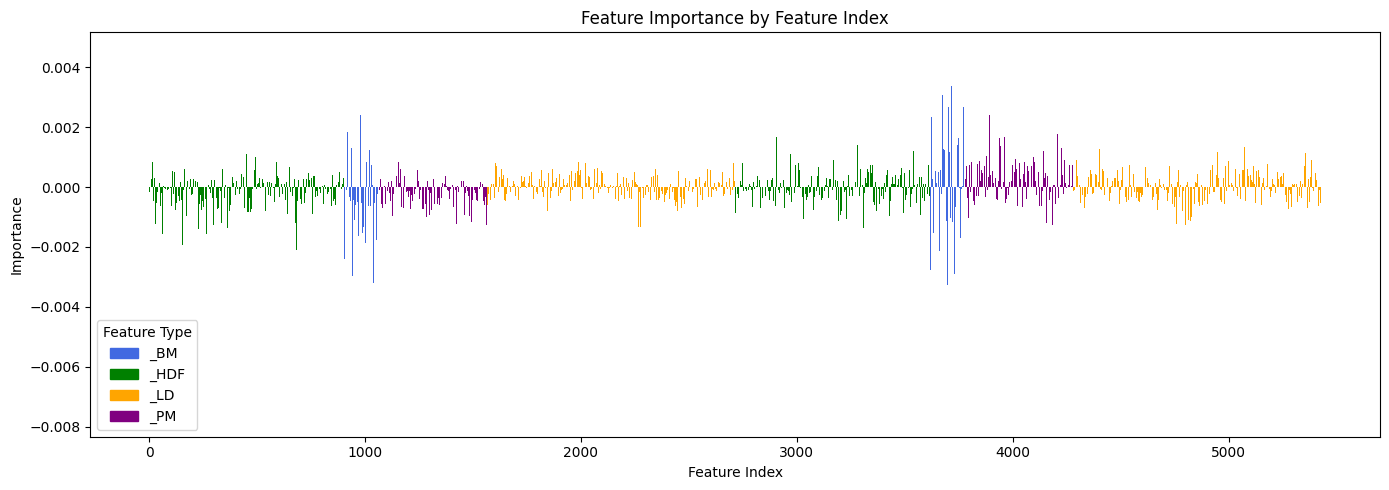

In [59]:
import matplotlib.pyplot as plt

def plot_feature_importance_bar(df, figsize=(14,5), title='Feature Importance by Feature Index'):
    df = df.reset_index(drop=True)
    df['feature_index'] = df.index

    # 提取特征后缀
    def get_suffix(name):
        for suffix in ['_BM', '_HDF', '_LD', '_PM']:
            if name.endswith(suffix):
                return suffix
        return 'Other'

    df['suffix'] = df['name'].apply(get_suffix)

    # 给每种后缀设颜色
    color_dict = {
        '_BM': 'royalblue',
        '_HDF': 'green',
        '_LD': 'orange',
        '_PM': 'purple',
    }

    df['color'] = df['suffix'].map(color_dict)

    plt.figure(figsize=figsize)
    
    # 画柱状图，每根柱子颜色根据block区分
    plt.bar(df['feature_index'], df['importance'], color=df['color'], edgecolor='none')

    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.title(title)
    # 自定义图例
    handles = [plt.Rectangle((0,0),1,1,color=color_dict[key]) for key in color_dict]
    labels = list(color_dict.keys())
    plt.legend(handles, labels, title='Feature Type')
    
    plt.tight_layout()
    plt.show()

# 调用示例
plot_feature_importance_bar(df_importance)


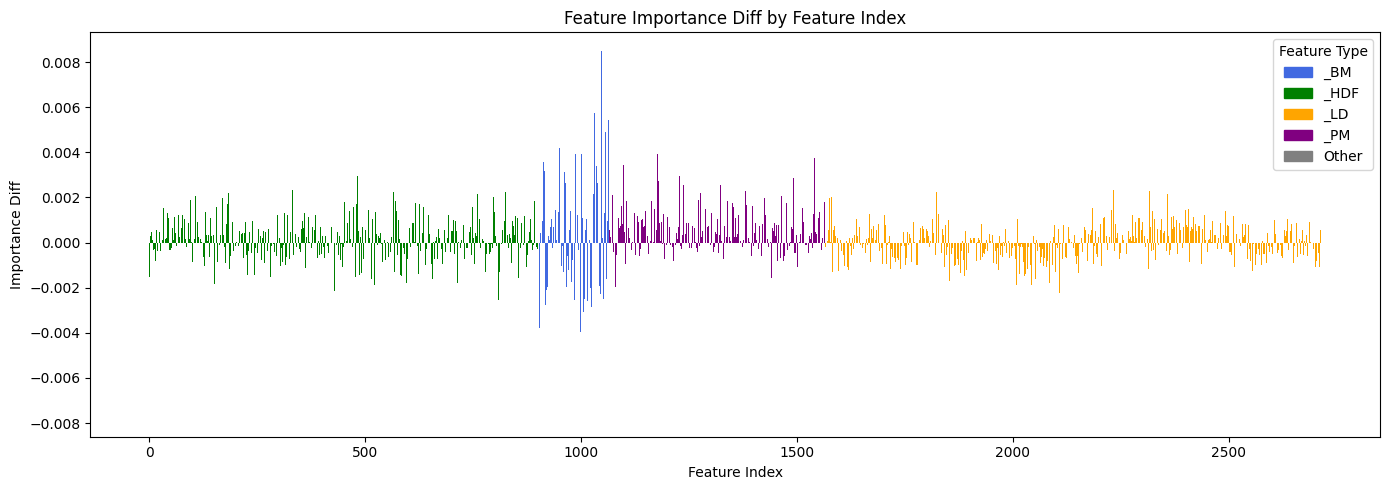

In [65]:
import matplotlib.pyplot as plt

def plot_feature_importance_diff_bar(df, figsize=(14,5), title='Feature Importance Diff by Feature Index'):
    df = df.reset_index(drop=True)
    df['feature_index'] = df.index

    # 提取特征后缀作为类型标识（用于上色）
    def get_suffix(name):
        for suffix in ['_BM', '_HDF', '_LD', '_PM']:
            if name.endswith(suffix):
                return suffix
        return 'Other'

    df['suffix'] = df['name'].apply(get_suffix)

    # 为不同suffix指定颜色
    color_dict = {
        '_BM': 'royalblue',
        '_HDF': 'green',
        '_LD': 'orange',
        '_PM': 'purple',
        'Other': 'gray'
    }

    df['color'] = df['suffix'].map(color_dict)

    # 开始画图
    plt.figure(figsize=figsize)
    
    plt.bar(df['feature_index'], df['importance_diff'], color=df['color'], edgecolor='none')

    plt.xlabel('Feature Index')
    plt.ylabel('Importance Diff')
    plt.title(title)

    # 图例自定义
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[key]) for key in color_dict]
    labels = list(color_dict.keys())
    plt.legend(handles, labels, title='Feature Type')

    plt.tight_layout()
    plt.show()

# ✅ 调用方式
plot_feature_importance_diff_bar(df_importance_diff)


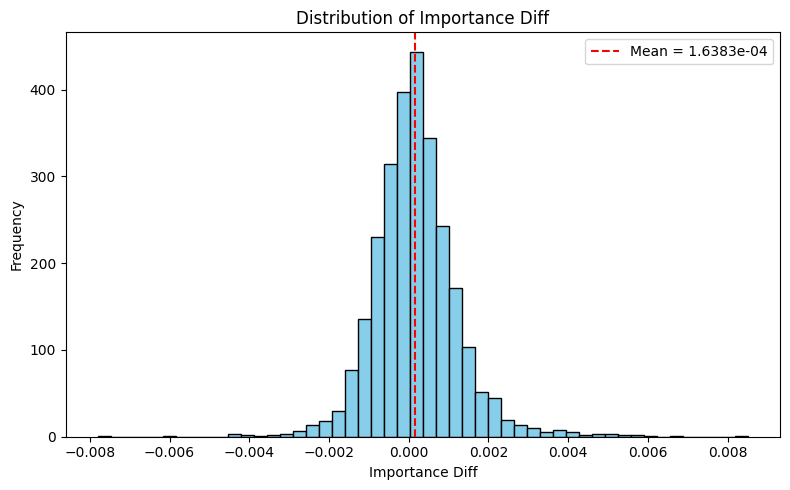

In [67]:
import matplotlib.pyplot as plt

def plot_importance_diff_histogram(df, bins=50, figsize=(8, 5), title='Distribution of Importance Diff'):
    plt.figure(figsize=figsize)
    
    plt.hist(df['importance_diff'], bins=bins, color='skyblue', edgecolor='black')
    
    plt.xlabel('Importance Diff')
    plt.ylabel('Frequency')
    plt.title(title)
    
    # 加上一条均值的竖线
    mean_val = df['importance_diff'].mean()
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_val:.4e}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ✅ 使用你的 df_importance_diff 调用
plot_importance_diff_histogram(df_importance_diff)


In [17]:
feature_importance= model.compute_feature_importance(
    dataset=whole_dataset,
    target_var="clin",
    method="GradientShap",       #  这里你选择 GradientShap
    steps_or_samples=10,         # 可选，控制精度，默认是 5
    batch_size=32                # 可选，默认是 64
)
feature_importance

,target_variable,target_class,target_class_label,layer,name,importance
0,clin,0,DM,HDF,HDF38768_HDF,0.002890
1,clin,0,DM,HDF,HDF38296_HDF,0.004125
2,clin,0,DM,HDF,HDF57814_HDF,0.003014
3,clin,0,DM,HDF,HDF48762_HDF,0.007788
4,clin,0,DM,HDF,HDF52603_HDF,0.010300
...,...,...,...,...,...,...
5425,clin,1,nonDM,BM,BM0159_BM,0.006936
5426,clin,1,nonDM,BM,BM0160_BM,0.006878
5427,clin,1,nonDM,BM,BM0161_BM,0.002791
5428,clin,1,nonDM,BM,BM0162_BM,0.007753


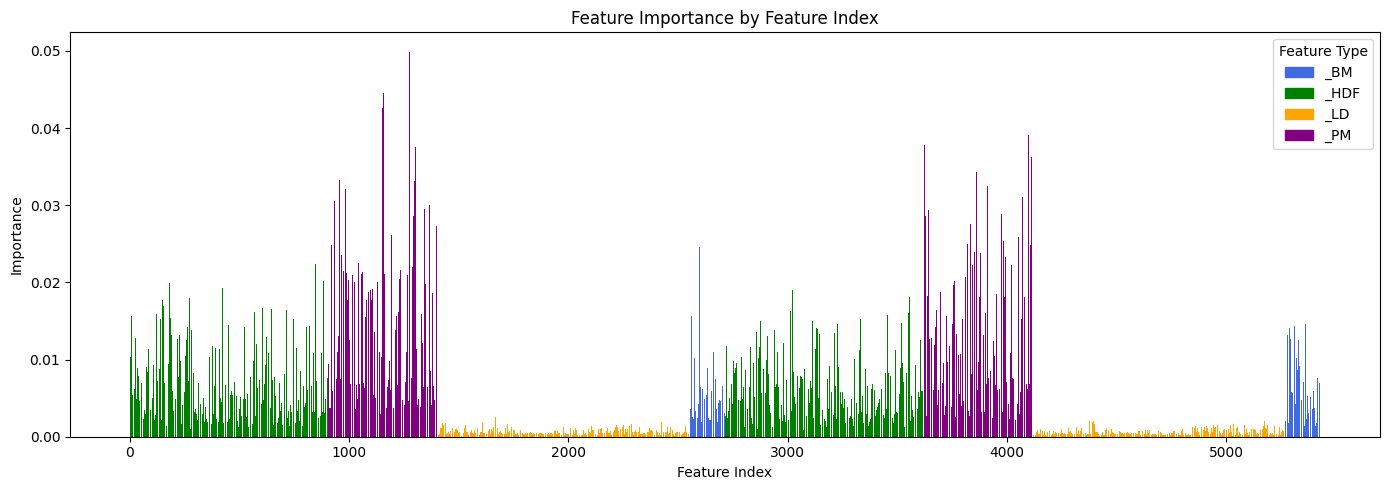

In [94]:
import matplotlib.pyplot as plt

def plot_feature_importance_bar(df, figsize=(14,5), title='Feature Importance by Feature Index'):
    df = df.reset_index(drop=True)
    df['feature_index'] = df.index

    # 提取特征后缀
    def get_suffix(name):
        for suffix in ['_BM', '_HDF', '_LD', '_PM']:
            if name.endswith(suffix):
                return suffix
        return 'Other'

    df['suffix'] = df['name'].apply(get_suffix)

    # 给每种后缀设颜色
    color_dict = {
        '_BM': 'royalblue',
        '_HDF': 'green',
        '_LD': 'orange',
        '_PM': 'purple',
    }

    df['color'] = df['suffix'].map(color_dict)

    plt.figure(figsize=figsize)
    
    # 画柱状图，每根柱子颜色根据block区分
    plt.bar(df['feature_index'], df['importance'], color=df['color'], edgecolor='none')

    plt.xlabel('Feature Index')
    plt.ylabel('Importance')
    plt.title(title)
    # 自定义图例
    handles = [plt.Rectangle((0,0),1,1,color=color_dict[key]) for key in color_dict]
    labels = list(color_dict.keys())
    plt.legend(handles, labels, title='Feature Type')
    
    plt.tight_layout()
    plt.show()

# 调用示例
plot_feature_importance_bar(feature_importance)


In [122]:
top_features

,name,feature_type,importance
0,PM33163_PM,PM,0.049909
1,PM39518_PM,PM,0.049442
2,PM38002_PM,PM,0.047481
3,PM34732_PM,PM,0.046190
4,PM33163_PM,PM,0.045259
...,...,...,...
266,PM35136_PM,PM,0.020318
267,PM32632_PM,PM,0.020286
268,BM0037_BM,BM,0.020268
269,PM34389_PM,PM,0.020260


# Model stability check

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

def prepare_and_save_data(test_size=0.3,random_seed=42, debug=True):
    load_path=r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\data\preprocessed data"
    metadata_path=r"C:\Users\laura\OneDrive - Imperial College London\project 2\sample data.xlsx"
    save_base_path=r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test"
    # 读取数据
    HDF = pd.read_csv(os.path.join(load_path, "S_HDF.csv"), index_col=0)
    LD  = pd.read_csv(os.path.join(load_path, "S_LD.csv"), index_col=0)
    PM  = pd.read_csv(os.path.join(load_path, "S_PM.csv"), index_col=0)
    BM  = pd.read_csv(os.path.join(load_path, "S_BM.csv"), index_col=0)
    
    metadata = pd.read_excel(metadata_path)
    metadata['SampleId'] = metadata['SampleId'].astype(int)
    HDF.index = HDF.index.astype(int)
    
    merged_df = HDF.merge(
        metadata[['SampleId', 'SEX', 'DIAB', 'AGE', 'BMI']],
        left_index=True,
        right_on='SampleId'
    )
    
    merged_df['SEX_num'] = merged_df['SEX'].str.strip().str.lower().map({'female': 1, 'male': 0})
    merged_df['DIAB_num'] = merged_df['DIAB'].str.strip().str.lower().map({'diabetic': 1, 'non-diabetic': 0})
    
    y_dm = merged_df['DIAB_num']
    y_dm.index = HDF.index

    # 划分数据
    HDF_train, HDF_test, y_train, y_test = train_test_split(
        HDF, y_dm, test_size=test_size, random_state=random_seed
    )
    LD_train = LD.loc[HDF_train.index]
    LD_test  = LD.loc[HDF_test.index]
    PM_train = PM.loc[HDF_train.index]
    PM_test  = PM.loc[HDF_test.index]
    BM_train = BM.loc[HDF_train.index]
    BM_test  = BM.loc[HDF_test.index]
    Y_train = y_dm.loc[HDF_train.index]
    Y_test  = y_dm.loc[HDF_test.index]
    
    # 保存路径准备
    train_path = os.path.join(save_base_path, "train")
    test_path = os.path.join(save_base_path, "test")
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    # 保存函数
    def save_train(df, suffix, filename):
        df.columns = df.columns.astype(str) + f"_{suffix}"
        df.index = df.index.astype(str).map(lambda x: "ID_" + x)
        df.T.to_csv(os.path.join(train_path, f"{filename}.csv"), index=True)

    def save_test(df, suffix, filename):
        df.columns = df.columns.astype(str) + f"_{suffix}"
        df.index = df.index.astype(str).map(lambda x: "ID_" + x)
        df.T.to_csv(os.path.join(test_path, f"{filename}.csv"), index=True)

    def save_clinical_train(series, filename):
        df = series.to_frame(name='clin')
        df.index = df.index.astype(str).map(lambda x: "ID_" + x)
        df.to_csv(os.path.join(train_path, f"{filename}.csv"), index=True)

    def save_clinical_test(series, filename):
        df = series.to_frame(name='clin')
        df.index = df.index.astype(str).map(lambda x: "ID_" + x)
        df.to_csv(os.path.join(test_path, f"{filename}.csv"), index=True)

    # 保存训练集
    save_train(LD_train, "LD", "LD")
    save_train(PM_train, "PM", "PM")
    save_train(BM_train, "BM", "BM")
    save_train(HDF_train, "HDF", "HDF")
    save_clinical_train(Y_train, "clin")

    # 保存测试集
    save_test(LD_test, "LD", "LD")
    save_test(PM_test, "PM", "PM")
    save_test(BM_test, "BM", "BM")
    save_test(HDF_test, "HDF", "HDF")
    save_clinical_test(Y_test, "clin")

    print(f"[✓] Split ratio: {1 - test_size:.2f} train / {test_size:.2f} test | seed={random_seed}")

prepare_and_save_data(test_size=0.3,random_seed=42)

In [19]:
# Functions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
def prepare_and_save_data(test_size=0.3, random_seed=42, debug=True):

    load_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Yuting Project - Machine Learning Driven Integration - shared folder\data\preprocessed data"
    metadata_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\sample data.xlsx"
    save_base_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test"

    # 读取数据
    HDF = pd.read_csv(os.path.join(load_path, "S_HDF.csv"), index_col=0)
    LD  = pd.read_csv(os.path.join(load_path, "S_LD.csv"), index_col=0)
    PM  = pd.read_csv(os.path.join(load_path, "S_PM.csv"), index_col=0)
    BM  = pd.read_csv(os.path.join(load_path, "S_BM.csv"), index_col=0)
    metadata = pd.read_excel(metadata_path)

    metadata['SampleId'] = metadata['SampleId'].astype(int)
    HDF.index = HDF.index.astype(int)

    merged_df = HDF.merge(
        metadata[['SampleId', 'SEX', 'DIAB', 'AGE', 'BMI']],
        left_index=True,
        right_on='SampleId'
    )
    merged_df['SEX_num'] = merged_df['SEX'].str.strip().str.lower().map({'female': 1, 'male': 0})
    merged_df['DIAB_num'] = merged_df['DIAB'].str.strip().str.lower().map({'diabetic': 1, 'non-diabetic': 0})
    y_dm = merged_df['DIAB_num']
    y_dm.index = HDF.index

    # ========== 调试模式：缩小样本数和特征数 ==========
    if debug:
        n_sample_debug = 50
        n_feature_debug = 80
        print(f"🧪 Debug mode active: Using {n_sample_debug} samples and {n_feature_debug} features per omic")

        # 随机选取样本
        sample_ids = HDF.sample(n=n_sample_debug, random_state=random_seed).index
        HDF = HDF.loc[sample_ids]
        LD = LD.loc[sample_ids]
        PM = PM.loc[sample_ids]
        BM = BM.loc[sample_ids]
        y_dm = y_dm.loc[sample_ids]
        metadata = metadata[metadata['SampleId'].isin(sample_ids)]

        # 截取特征前 N 个
        HDF = HDF.iloc[:, :n_feature_debug]
        LD = LD.iloc[:, :n_feature_debug]
        PM = PM.iloc[:, :n_feature_debug]
        BM = BM.iloc[:, :n_feature_debug]

    # ========== 划分数据 ==========
    HDF_train, HDF_test, y_train, y_test = train_test_split(
        HDF, y_dm, test_size=test_size, random_state=random_seed
    )
    LD_train = LD.loc[HDF_train.index]
    LD_test  = LD.loc[HDF_test.index]
    PM_train = PM.loc[HDF_train.index]
    PM_test  = PM.loc[HDF_test.index]
    BM_train = BM.loc[HDF_train.index]
    BM_test  = BM.loc[HDF_test.index]
    Y_train = y_dm.loc[HDF_train.index]
    Y_test  = y_dm.loc[HDF_test.index]

    # 保存路径准备
    train_path = os.path.join(save_base_path, "train")
    test_path = os.path.join(save_base_path, "test")
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    # 保存函数
    def save_train(df, suffix, filename):
        df.columns = df.columns.astype(str) + f"_{suffix}"
        df.index = df.index.astype(str).map(lambda x: "ID_" + x)
        df.T.to_csv(os.path.join(train_path, f"{filename}.csv"), index=True)

    def save_test(df, suffix, filename):
        df.columns = df.columns.astype(str) + f"_{suffix}"
        df.index = df.index.astype(str).map(lambda x: "ID_" + x)
        df.T.to_csv(os.path.join(test_path, f"{filename}.csv"), index=True)

    def save_clinical_train(series, filename):
        df = series.to_frame(name='clin')
        df.index = df.index.astype(str).map(lambda x: "ID_" + x)
        df.to_csv(os.path.join(train_path, f"{filename}.csv"), index=True)

    def save_clinical_test(series, filename):
        df = series.to_frame(name='clin')
        df.index = df.index.astype(str).map(lambda x: "ID_" + x)
        df.to_csv(os.path.join(test_path, f"{filename}.csv"), index=True)

    # 保存训练集
    save_train(LD_train, "LD", "LD")
    save_train(PM_train, "PM", "PM")
    save_train(BM_train, "BM", "BM")
    save_train(HDF_train, "HDF", "HDF")
    save_clinical_train(Y_train, "clin")

    # 保存测试集
    save_test(LD_test, "LD", "LD")
    save_test(PM_test, "PM", "PM")
    save_test(BM_test, "BM", "BM")
    save_test(HDF_test, "HDF", "HDF")
    save_clinical_test(Y_test, "clin")

    print(f"[✓] Split ratio: {1 - test_size:.2f} train / {test_size:.2f} test | seed={random_seed}")

prepare_and_save_data(test_size=0.3,random_seed=42)

# =============Feature importance==========================================
# diff
import torch
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from captum.attr import IntegratedGradients, GradientShap

def Forward_target(model, *args):
    input_data = list(args[:-2])  # one or more tensors (one per omics layer)
    target_var = args[-2]  # target variable of interest
    steps = args[-1]  # number of steps/samples for IntegratedGradients().attribute or GradientShap.attribute 
    outputs_list = []
    for i in range(steps):
        # get list of tensors for each step into a list of tensors
        x_step = [input_data[j][i] for j in range(len(input_data))]
        out = model.forward(x_step)
        outputs_list.append(out[target_var])
    return torch.cat(outputs_list, dim = 0)
    
def Compute_Feature_Importance_diff(
    model, 
    dataset, 
    target_var, 
    method="IntegratedGradients", 
    steps_or_samples=5, 
    batch_size=64, 
    device='cpu',
    feature_importances=None
):
    """
    Computes the feature importance for each variable in the dataset using either Integrated Gradients or Gradient SHAP.

    Args:
        model: your pytorch model
        dataset: The dataset object containing the features and data.
        target_var (str): The target variable for which feature importance is calculated.
        method (str, optional): The attribution method to use ("IntegratedGradients" or "GradientShap").
                                Defaults to "IntegratedGradients".
        steps_or_samples (int, optional): Number of steps for Integrated Gradients or samples for Gradient SHAP.
                                          Defaults to 5.
        batch_size (int, optional): The size of the batch to process the dataset. Defaults to 64.
        device (str, optional): 'cpu' or 'cuda'
        feature_importances (dict, optional): dict to store feature importance results

    Returns:
        pd.DataFrame: A DataFrame containing feature importances across different variables and data modalities.
    """
    model.to(device)

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Choose the attribution method dynamically
    if method == "IntegratedGradients":
        explainer = IntegratedGradients(lambda *args: Forward_target(model, *args))
    elif method == "GradientShap":
        explainer = GradientShap(lambda *args: Forward_target(model, *args))
    else:
        raise ValueError(f"Unsupported method '{method}'. Choose 'IntegratedGradients' or 'GradientShap'.")

    # Handle target class (numerical vs categorical)
    if dataset.variable_types[target_var] == 'numerical':
        num_class = 1
    else:
        num_class = len(np.unique([y[target_var] for _, y, _ in dataset]))

    aggregated_attributions = [[] for _ in range(num_class)]
    for batch in dataloader:
        dat, _, _ = batch
        x_list = [dat[x].to(device) for x in dat.keys()]
        input_data = tuple([data.unsqueeze(0).requires_grad_() for data in x_list])

        if method == 'IntegratedGradients':
            baseline = tuple(torch.zeros_like(x) for x in input_data)
        elif method == 'GradientShap': # provide multiple baselines for Gr.Shap
            baseline = tuple(
                torch.cat([torch.zeros_like(x) for _ in range(steps_or_samples)], dim=0)
                for x in input_data
            )
        if num_class == 1:
            if method == 'IntegratedGradients':
                attributions = explainer.attribute(input_data, baseline, 
                                             additional_forward_args=(target_var, steps_or_samples), 
                                             n_steps=steps_or_samples)
            elif method == 'GradientShap':
                attributions = explainer.attribute(input_data, baseline, 
                                             additional_forward_args=(target_var, steps_or_samples), 
                                             n_samples=steps_or_samples)
            aggregated_attributions[0].append(attributions)
        else:
            for target_class in range(num_class):
                if method == 'IntegratedGradients':
                    attributions = explainer.attribute(input_data, baseline, 
                                                       additional_forward_args=(target_var, steps_or_samples), 
                                                       target=target_class,
                                                       n_steps=steps_or_samples)
                elif method == 'GradientShap':
                    attributions = explainer.attribute(input_data, baseline, 
                                                       additional_forward_args=(target_var, steps_or_samples), 
                                                       target=target_class,
                                                       n_samples=steps_or_samples)
                aggregated_attributions[target_class].append(attributions)
    # Post-process attributions
    layers = list(dataset.dat.keys())
    num_layers = len(layers)
    processed_attributions = []
    for class_idx in range(len(aggregated_attributions)):
        class_attr = aggregated_attributions[class_idx]
        layer_attributions = []
        for layer_idx in range(num_layers):
            layer_tensors = [batch_attr[layer_idx] for batch_attr in class_attr]
            attr_concat = torch.cat(layer_tensors, dim=1)
            layer_attributions.append(attr_concat)
        processed_attributions.append(layer_attributions)

    #abs_attr = [[torch.abs(a).cpu() for a in attr_class] for attr_class in processed_attributions]
    #imp = [[a.mean(dim=1) for a in attr_class] for attr_class in abs_attr]
    attr_cpu = [[a.cpu() for a in attr_class] for attr_class in processed_attributions]
    imp = [[a.mean(dim=1) for a in attr_class] for attr_class in attr_cpu]

    model.to('cpu')

    # Combine results into a DataFrame
    df_list = []
    for i in range(num_class):
        for j in range(len(layers)):
            features = dataset.features[layers[j]]
            importances = imp[i][j][0].detach().numpy()
            target_class_label = dataset.label_mappings[target_var].get(i) if target_var in dataset.label_mappings else ''
            df_list.append(pd.DataFrame({'target_variable': target_var, 
                                         'target_class': i, 
                                         'target_class_label': target_class_label,
                                         'layer': layers[j], 
                                         'name': features, 
                                         'importance': importances}))    
    df_imp = pd.concat(df_list, ignore_index=True)
    if feature_importances is not None:
        feature_importances[target_var] = df_imp


        # === 新增部分：生成 class_diff 表格 ===
    if num_class == 2:
        df_0 = df_imp[df_imp['target_class'] == 0].copy()
        df_1 = df_imp[df_imp['target_class'] == 1].copy()

        # 设定索引用于匹配
        key_cols = ['target_variable', 'layer', 'name']
        df_0 = df_0.set_index(key_cols)
        df_1 = df_1.set_index(key_cols)

        # 对应相减，得到方向性差值
        diff_series = df_1['importance'] - df_0['importance']

        # 构建结果表格
        class_diff = pd.DataFrame({
            'target_variable': df_1.index.get_level_values('target_variable'),
            'layer': df_1.index.get_level_values('layer'),
            'name': df_1.index.get_level_values('name'),
            'importance_diff': diff_series,
            'importance_diff_abs': diff_series.abs()
        }).reset_index(drop=True)

    else:
        class_diff = None  # 多于两个类别暂不支持自动计算差值

    return df_imp, class_diff



🧪 Debug mode active: Using 50 samples and 80 features per omic
[✓] Split ratio: 0.70 train / 0.30 test | seed=42


In [ ]:
# 示例代码总结（inactive）
import inspect
from flexynesis import DataImporter
from flexynesis import DataImporter
# ==============Prepare data folder====================
prepare_and_save_data(test_size=0.3,random_seed=42)

#==============Data import====================
data_importer = DataImporter(
    path=r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test",
    data_types=['BM'], 
    concatenate=False,  # 根据你需求决定是否合并特征，通常False
    top_percentile=100,  # Laplacian选出前10%特征
    min_features=100,   # 至少保留100个特征
    variance_threshold=0.0,  # 80%的方差阈值
    # correlation_threshold=0.9,  # 如果需要可以打开
)

train_dataset, test_dataset, whole_dataset = data_importer.import_data()

#====================HPO===============================
# early stopping -  tune the best parameters
tuner = flexynesis.HyperparameterTuning(
    dataset = train_dataset,                # training dataset
    model_class = flexynesis.DirectPred,   # model selection
    target_variables = ["clin"],# outcome variable
    config_name = "DirectPred",             
    n_iter=30, # how many time the hyperparameters are trained
    cv_splits=5,
    plot_losses=True,                      # open the losss ploting function
    early_stop_patience=5               
)

model, best_params, configs = tuner.perform_tuning()  

#==================Prediction=======================
y_pred_dict = model.predict(test_dataset)
metrics_df = flexynesis.evaluate_wrapper(method = 'DirectPred', y_pred_dict=y_pred_dict, dataset = test_dataset)

#=================Feature importance===================
df_importance, df_importance_diff = Compute_Feature_Importance_diff(
    model=model,
    dataset=whole_dataset,
    target_var="clin",
    method="GradientShap",
    steps_or_samples=10,
    batch_size=32,
    device='cpu'
)



In [25]:
import os
import json
import pandas as pd

def run_stability_test_dict(
    test_sizes=[0.3],
    seeds=[0, 1, 2, 42, 2023],
    base_path=None,
    save_path='stability_results.json',  # 改为json格式保存
    importance_dir="feature_importance"
):
    results_dict = {}

    # 创建存储 feature importance 的文件夹
    os.makedirs(importance_dir, exist_ok=True)

    for test_size in test_sizes:
        test_key = f"test_size_{test_size}"
        results_dict[test_key] = {}

        for seed in seeds:
            print(f"\n🔁 Running for test_size={test_size}, seed={seed}")
            seed_key = f"seed_{seed}"

            # ======== Step 1: Prepare data ========
            prepare_and_save_data(test_size=test_size, random_seed=seed, debug=True)

            # ======== Step 2: Data Import ========
            data_importer = DataImporter(
                path=base_path,
                data_types=['BM'],
                concatenate=False,
                top_percentile=100,
                min_features=100,
                variance_threshold=0.0,
            )
            train_dataset, test_dataset, whole_dataset = data_importer.import_data()

            # ======== Step 3: HPO and training ========
            tuner = HyperparameterTuning(
                dataset=train_dataset,
                model_class=DirectPred,
                target_variables=["clin"],
                config_name="DirectPred",
                n_iter=1,
                cv_splits=0,
                plot_losses=False,
                early_stop_patience=1
            )
            model, best_params, configs = tuner.perform_tuning()

            # ======== Step 4: Prediction & Evaluation ========
            y_pred_dict = model.predict(test_dataset)
            metrics_df = evaluate_wrapper(method='DirectPred', y_pred_dict=y_pred_dict, dataset=test_dataset)

            # ======== Step 5: Feature Importance ========
            df_importance, df_importance_diff = Compute_Feature_Importance_diff(
                model=model,
                dataset=whole_dataset,
                target_var="clin",
                method="GradientShap",
                steps_or_samples=10,
                batch_size=32,
                device='cpu'
            )

            # 保存 feature importance CSV 备份（可选）
            #imp_filename = f"importance_ts{test_size}_seed{seed}.csv"
            #df_importance.to_csv(os.path.join(importance_dir, imp_filename))

            # ======== Step 6: 构造字典保存 ========
            pred_df = test_dataset.target_df.copy()
            pred_df["predicted_prob"] = y_pred_dict["clin"]["probs"][:, 1]
            pred_df["predicted_class"] = y_pred_dict["clin"]["preds"]

            # 保存预测结果为字典，key是sample_id
            predictions = {}
            for idx, row in pred_df.iterrows():
                predictions[str(idx)] = {
                    "true_label": int(row["clin"]),
                    "predicted_prob": float(row["predicted_prob"]),
                    "predicted_class": int(row["predicted_class"])
                }

            # 转换指标为普通字典（假设metrics_df是pandas.Series或类似）
            metrics = {}
            if hasattr(metrics_df, 'to_dict'):
                metrics = metrics_df.to_dict()
            else:
                # 如果是普通dict或其他格式，尽量转成dict
                metrics = dict(metrics_df)

            # 整理存储
            results_dict[test_key][seed_key] = {
                "best_params": best_params,
                "configs": configs,  # 你原代码里有configs，先存着
                "metrics": metrics,
                "predictions": predictions,
                "feature_importance": df_importance.to_dict(orient='records')
            }

    # ======== Step 7: 保存整个字典为 JSON ========
    with open(save_path, 'w') as f:
        json.dump(results_dict, f, indent=2)

    print(f"\n✅ Stability test finished. Results saved to: {save_path}")
    print(f"🧠 Feature importance files saved to: {importance_dir}/")

    return results_dict


# 用法示范
base_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test"

save_path = os.path.join(base_path, "stability_results.json")
importance_dir = os.path.join(base_path, "feature_importance")

results_dict = run_stability_test_dict(
    test_sizes=[0.2, 0.3],
    seeds=[0, 42, 2023],
    base_path=base_path,
    save_path=save_path,
    importance_dir=importance_dir
)



🔁 Running for test_size=0.2, seed=0
🧪 Debug mode active: Using 50 samples and 80 features per omic
[✓] Split ratio: 0.80 train / 0.20 test | seed=0


NameError: name 'DataImporter' is not defined

In [ ]:
def run_stability_test(
    test_sizes=[0.3],
    seeds=[0, 1, 2, 42, 2023],
    base_path=None,
    save_path='stability_results.csv',
    importance_dir="feature_importance"
):
    results_list = []

    # 创建存储 feature importance 的文件夹
    os.makedirs(importance_dir, exist_ok=True)

    for test_size in test_sizes:
        for seed in seeds:
            print(f"\n🔁 Running for test_size={test_size}, seed={seed}")
            
            # ======== Step 1: Prepare data ========
            prepare_and_save_data(test_size=test_size, random_seed=seed, debug=True)

            # ======== Step 2: Data Import ========
            data_importer = DataImporter(
                path=base_path,
                data_types=['BM'],
                concatenate=False,
                top_percentile=100,
                min_features=100,
                variance_threshold=0.0,
            )
            train_dataset, test_dataset, whole_dataset = data_importer.import_data()

            # ======== Step 3: HPO and training ========
            tuner = HyperparameterTuning(
                dataset=train_dataset,
                model_class=DirectPred,
                target_variables=["clin"],
                config_name="DirectPred",
                n_iter=1,
                cv_splits=0,
                plot_losses=False,
                early_stop_patience=1
            )
            model, best_params, configs = tuner.perform_tuning()

            # ======== Step 4: Prediction & Evaluation ========
            y_pred_dict = model.predict(test_dataset)
            metrics_df = evaluate_wrapper(method='DirectPred', y_pred_dict=y_pred_dict, dataset=test_dataset)

            # ======== Step 5: Feature Importance ========
            df_importance, df_importance_diff = Compute_Feature_Importance_diff(
                model=model,
                dataset=whole_dataset,
                target_var="clin",
                method="GradientShap",
                steps_or_samples=10,
                batch_size=32,
                device='cpu'
            )
            # 保存 feature importance CSV
            imp_filename = f"importance_ts{test_size}_seed{seed}.csv"
            df_importance.to_csv(os.path.join(importance_dir, imp_filename))

            # ======== Step 6: Save prediction + configs + metrics ========
            pred_df = test_dataset.target_df.copy()
            pred_df["predicted_prob"] = y_pred_dict["clin"]["probs"][:, 1]
            pred_df["predicted_class"] = y_pred_dict["clin"]["preds"]

            for idx, row in pred_df.iterrows():
                results_list.append({
                    "test_size": test_size,
                    "random_seed": seed,
                    "sample_id": idx,
                    "true_label": row["clin"],
                    "predicted_prob": row["predicted_prob"],
                    "predicted_class": row["predicted_class"],
                    "accuracy": metrics_df.get("accuracy"),
                    "f1": metrics_df.get("f1_score"),
                    "auroc": metrics_df.get("auroc"),
                    "loss": metrics_df.get("loss"),
                    "best_params": json.dumps(best_params)  # 用json序列化，方便读写
                })

    # ======== Step 7: Save to CSV ========
    df_result = pd.DataFrame(results_list)
    df_result.to_csv(save_path, index=False)
    print(f"\n✅ Stability test finished. Results saved to: {save_path}")
    print(f"🧠 Feature importance files saved to: {importance_dir}/")

    return df_result
    
base_path = r"C:\Users\laura\OneDrive - Imperial College London\project 2\Coding\New models\package\flexynesis\dataset_DM_stablility_test"

save_path = os.path.join(base_path, "stability_results.csv")
importance_dir = os.path.join(base_path, "feature_importance")

df_result = run_stability_test(
    test_sizes=[0.2, 0.3],
    seeds=[0, 42, 2023],
    base_path=base_path,
    save_path=save_path,
    importance_dir=importance_dir
)
